# DRUGS INVENTORY OPTIMIZER

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('salesdaily.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [5]:
df.shape

(2106, 13)

In [6]:
df.isna().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [7]:
df['M01AB'].describe()

count    2106.000000
mean        5.033683
std         2.737579
min         0.000000
25%         3.000000
50%         4.990000
75%         6.670000
max        17.340000
Name: M01AB, dtype: float64

#### Exploratory data analysis

<BarContainer object of 2106 artists>

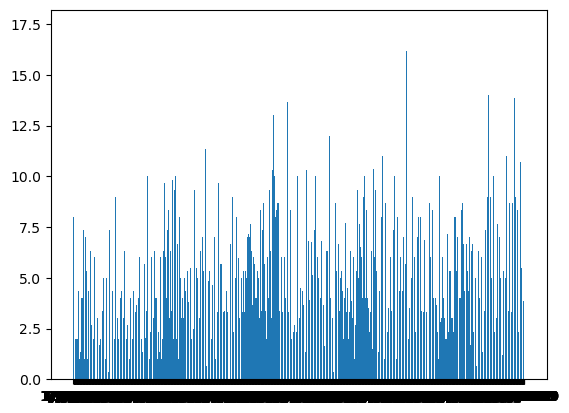

In [8]:
plt.bar(df['datum'],df['M01AB'])

In [9]:
from fitter import Fitter, get_common_distributions, get_distributions

2024-05-01 15:08:16.839 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.571747)
2024-05-01 15:08:16.935 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.561847)
2024-05-01 15:08:17.221 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.562309)
2024-05-01 15:08:17.235 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.156479)
2024-05-01 15:08:17.345 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with error=0.565105)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.561847,771.684892,788.642529,inf,0.042918,8.283949e-04
beta,0.562309,787.015056,809.625238,inf,0.040726,1.796815e-03
burr,0.565105,764.913788,787.523971,inf,0.043873,5.836282e-04
norm,0.571747,900.137882,911.442973,inf,0.069177,3.302375e-09
lognorm,1.156479,1487.776038,1504.733675,inf,0.525829,0.000000e+00


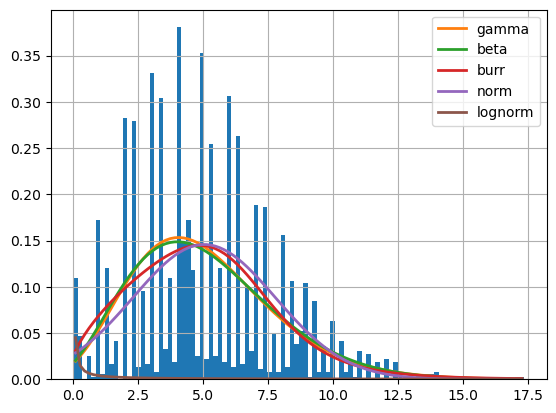

In [10]:
f = Fitter(df['M01AB'],distributions=[
    'norm',
    'lognorm',
    'beta',
    'burr',
    'gamma'
])

f.fit()
f.summary()

In [11]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 7.75685856259864,
  'loc': -2.6369622193112985,
  'scale': 0.9888859497008815}}

In [12]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [13]:
day_wise_data = df.groupby(['Weekday Name'])[['M01AB']].mean()
day_wise_data = day_wise_data.reindex(order)
X=day_wise_data.index.tolist()
Y=day_wise_data['M01AB'].tolist()

<BarContainer object of 7 artists>

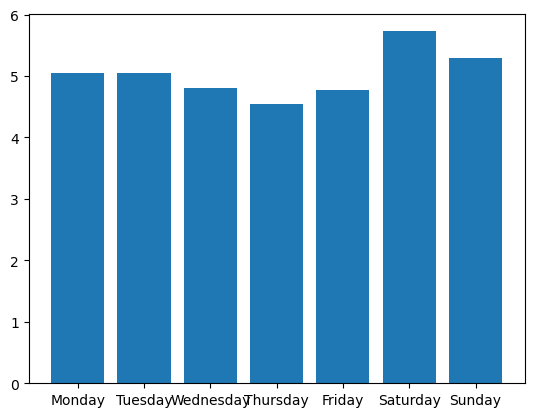

In [14]:
plt.bar(x=X,height=Y)

### GENERATING DATA OF SALES FROM THE COLUMN OF UNITS SOLD

In [15]:
unit_price=120

In [16]:
medicine_sales_df = pd.DataFrame()

In [17]:
medicine_sales_df['sales'] = df['M01AB'].apply(lambda x : 1000*x*unit_price)

In [18]:
medicine_sales_df

,sales
0,0.0
1,960000.0
2,240000.0
3,480000.0
4,600000.0
...,...
2101,880800.0
2102,460800.0
2103,480000.0
2104,880800.0


In [19]:
medicine_sales_df['Date'] = df['datum']
medicine_sales_df.set_index('Date')

,sales
Date,
1/2/2014,0.0
1/3/2014,960000.0
1/4/2014,240000.0
1/5/2014,480000.0
1/6/2014,600000.0
...,...
10/4/2019,880800.0
10/5/2019,460800.0
10/6/2019,480000.0


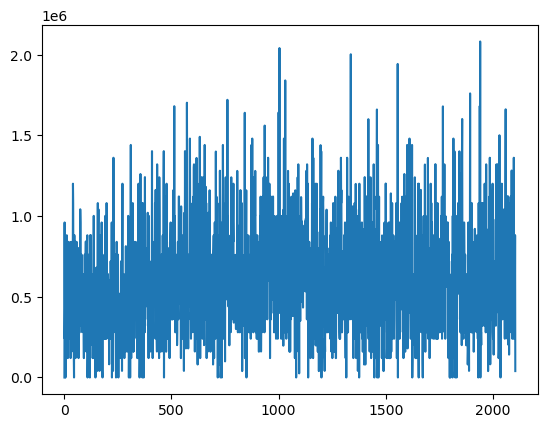

In [20]:
plt.plot(medicine_sales_df['sales'])

In [21]:
medicine_sales_df['sales'].isna().sum()

0

### LOOKING FOR SIGNIFICANT PATTERNS, TRENDS AND STATIONARITY IN THE SALES

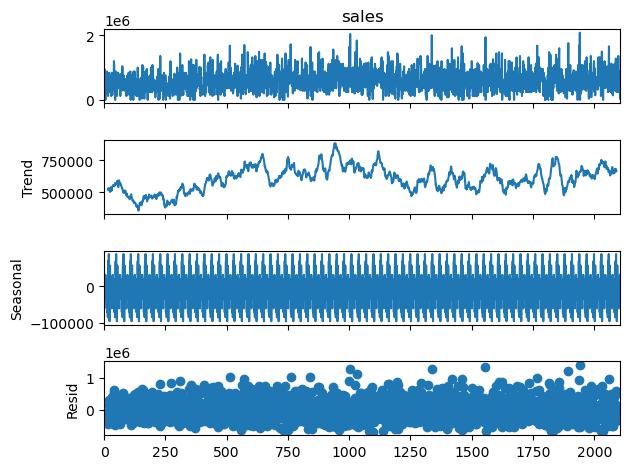

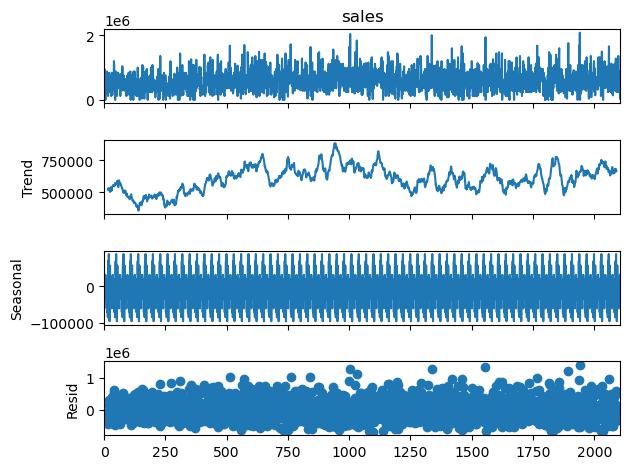

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
rolling_mean = seasonal_decompose(medicine_sales_df['sales'].rolling(1).mean().dropna(),period=30)
rolling_mean.plot()

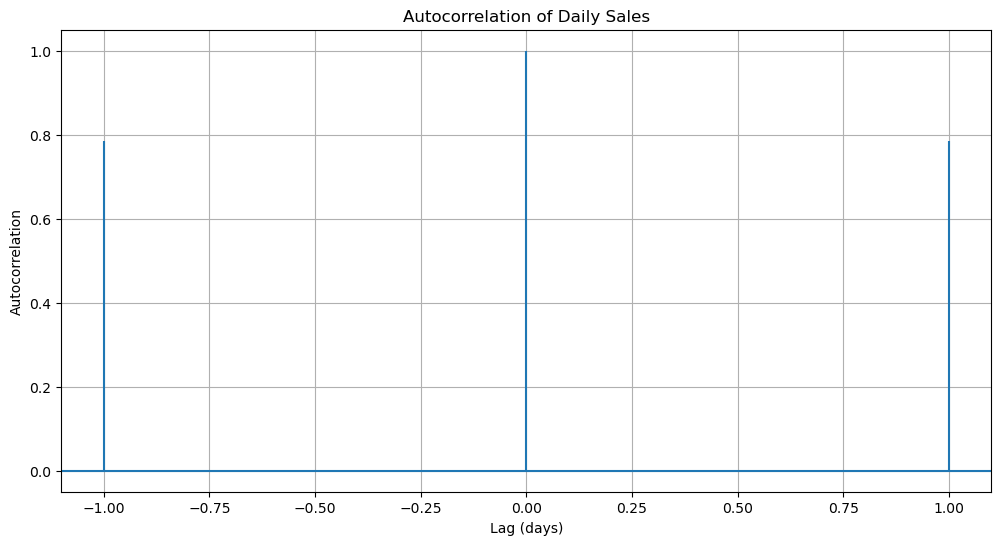

In [23]:
plt.figure(figsize=(12, 6))
plt.acorr(medicine_sales_df['sales'],maxlags=1)
plt.title('Autocorrelation of Daily Sales')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### Performing statistical test to check if there is stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



adf_test(medicine_sales_df['sales'])

Results of Dickey-Fuller Test:
Test Statistic                -8.279357e+00
p-value                        4.563943e-13
#Lags Used                     1.400000e+01
Number of Observations Used    2.091000e+03
Critical Value (1%)           -3.433481e+00
Critical Value (5%)           -2.862923e+00
Critical Value (10%)          -2.567506e+00
dtype: float64


### Creating RL agent that adds optimal quantity of drug in the inventory

In [25]:
class InventoryEnv():
    def __init__(self,demand_data):
        self.n_period=len(demand_data)
        self.current_period=0

        self.inventory_lvl=30000
        self.inventory_pos=30000
        self.capacity=60000

        self.holding_cost=24
        self.unit_price=120
        self.fixed_cost=50
        self.variable_cost=20

        self.lead_period=0

        self.demand_list=list(demand_data)

        self.state=self.inventory_pos
        self.state_list=[]
        self.state_list.append(self.state)
        self.action_list=[]

        self.reward_list=[]
        self.profit=0


    def reset_env(self):

        self.inventory_lvl=30000
        self.inventory_pos=30000
        self.state = self.inventory_lvl

        self.current_period=0

        self.state_list.append(self.state)

        return self.state

    def reset_inventory(self):
        self.inventory_lvl=30000
        self.inventory_pos=30000
        self.state = self.inventory_lvl
        cost =self.state*self.variable_cost + self.fixed_cost
        self.profit = self.profit-cost

        return self.profit,self.profit/max(cost,self.profit)
        

    def step(self,action):
        added=0
        if (action>0):
            added=1

        demand = self.demand_list[self.current_period]

        punish=0
        frac=1
        if (self.inventory_lvl==0):
            punish,frac=self.reset_inventory()

        if (demand>self.inventory_lvl):
            units_sold=self.inventory_lvl

        else:units_sold=demand

        if punish==0:
            
            reward = units_sold*self.unit_price-self.holding_cost*self.inventory_lvl-added*(self.fixed_cost+action*self.variable_cost)
            self.inventory_lvl=max(0,self.inventory_lvl-demand)
            self.inventory_pos=self.inventory_lvl

            self.profit=reward
        else :
            reward = self.profit*frac

        if (added and punish==0):
              self.inventory_lvl=min(self.inventory_lvl+action,self.capacity)
              self.inventory_pos=self.inventory_lvl

        self.state = self.inventory_pos
        self.current_period+=1
        self.state_list.append(self.state)
        self.reward_list.append(reward)
        self.action_list.append(action)

        if (self.current_period>=self.n_period):
            terminate=1
        else:terminate=0

        return self.state,reward,terminate

In [26]:
class Learner():
    def __init__(self,action_list,state_list,Q_table,alpha=0.9,gamma=0.9,epsilon=0.085,decay_rate=0.90,epsilon_min=0.01):
        self.action_list=action_list
        self.state_list=state_list
        self.alpha=alpha
        self.gamma=gamma
        self.epsilon=epsilon
        self.epsilon_list=[]
        self.decay_rate=decay_rate
        self.epsilon_min=epsilon_min
        self.Q_table = Q_table

    def initialise_table(self):
        for state in self.state_list:
            for action in self.action_list:
                self.Q_table[(state,action)]=0


    def take_action(self,state):
        if (self.epsilon>np.random.rand()):
            current_action = np.random.choice(self.action_list)
            return current_action
        else:
            best_q=float('-inf')
            best_action=0
            for key,value in self.Q_table.items():
                if (key[0]==state and value>best_q):
                    best_q=value
                    best_action=key[1]
            return best_action


    def learn(self,state,action,reward,next_state):
        prev_Q = self.Q_table[(state,action)]
        max_Q = float('-inf')

        for next_action in self.action_list:

          curr_Q = self.Q_table.get((next_state,next_action),float('-inf'))
          if curr_Q>max_Q:max_Q=curr_Q

        new_Q = prev_Q + self.alpha*(reward + self.gamma*(max_Q)-prev_Q)
        self.Q_table[(state,action)]=new_Q


    def decay_epsilon(self):
        self.epsilon_list.append(self.epsilon)
        self.epsilon = max(self.epsilon_min,self.epsilon*self.decay_rate)


In [27]:
demand_data = df['M01AB'].apply(lambda x : x*1000)

In [28]:
from sklearn.model_selection import train_test_split
train_size=int(0.9*(len(demand_data)))
X_train = demand_data[0:train_size]
X_test = demand_data[train_size:]

In [29]:
env = InventoryEnv(X_train)

In [30]:
action_space = [i for i in range(0,20000,500)]
state_space =  [lvl for lvl in range(0,env.capacity+1,1000)]

In [31]:
Q_table = {}

In [32]:
agent = Learner(action_space,state_space,Q_table)

In [33]:
agent.initialise_table()

In [34]:
reward_list = []
action_list = []

In [35]:
num_epochs=1500
for epoch in range(num_epochs):
    state = env.reset_env()
    total_reward=0
    total_action=0
    print("Running episode {}".format(epoch+1))

    
    terminate=0

    while not terminate:

        action = agent.take_action(state)
        next_state,reward,t = env.step(action)
        agent.learn(state,action,reward,next_state)

        total_reward+=reward
        total_action+=action
        if (t):
            terminate=1
            break
            
    reward_list.append(total_reward/len(X_train))
    action_list.append(total_action/len(X_train))
    print("Average profit in episode {e} : {p}".format(e=epoch+1,p=total_reward))

    agent.decay_epsilon()


Running episode 1
Average profit in episode 1 : -2123569519.99992
Running episode 2
Average profit in episode 2 : -2201165029.99992
Running episode 3
Average profit in episode 3 : -2208641399.99992
Running episode 4
Average profit in episode 4 : -2244980739.99992
Running episode 5
Average profit in episode 5 : -2270520139.9999275
Running episode 6
Average profit in episode 6 : -2259746599.9999275
Running episode 7
Average profit in episode 7 : -2263660739.99992
Running episode 8
Average profit in episode 8 : -2295073479.99992
Running episode 9
Average profit in episode 9 : -2266155529.99992
Running episode 10
Average profit in episode 10 : -2277691959.99992
Running episode 11
Average profit in episode 11 : -2278088009.99992
Running episode 12
Average profit in episode 12 : -2283889419.9999037
Running episode 13
Average profit in episode 13 : -2291363449.999912
Running episode 14
Average profit in episode 14 : -2275490039.99992
Running episode 15
Average profit in episode 15 : -22693117

In [36]:
len(reward_list)

1500

Text(0.5, 1.0, 'PROFIT GRAPH')

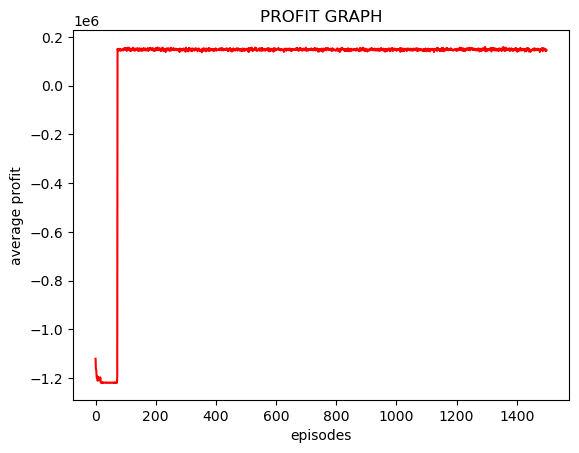

In [37]:
plt.plot(reward_list,color='red')
plt.xlabel("episodes")
plt.ylabel("average profit")
plt.title("PROFIT GRAPH")

Text(0.5, 1.0, 'REWARD GRAPH')

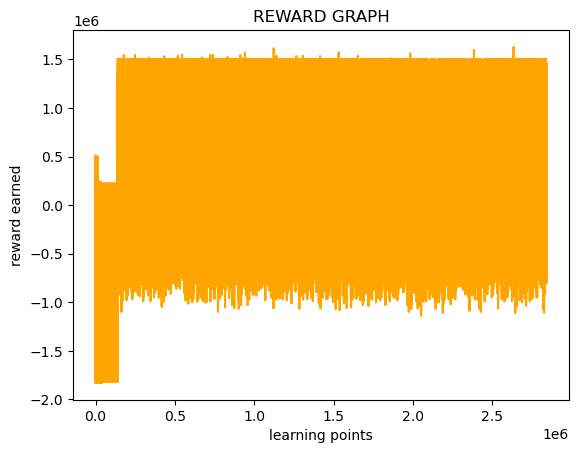

In [38]:
plt.plot(env.reward_list,color='orange')
plt.xlabel("learning points")
plt.ylabel("reward earned")
plt.title("REWARD GRAPH")

Text(0.5, 1.0, 'STATE GRAPH')

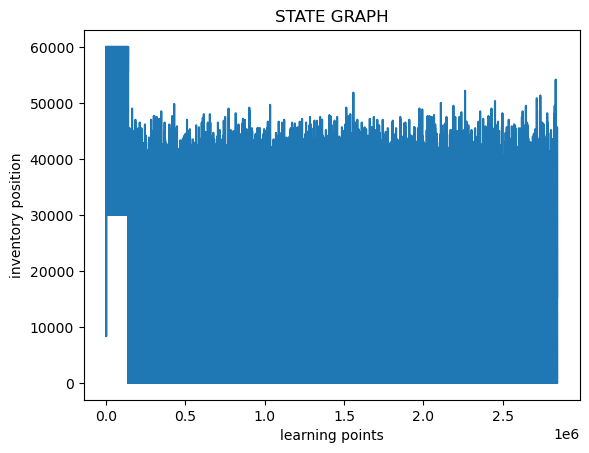

In [39]:
plt.plot(env.state_list)
plt.xlabel("learning points")
plt.ylabel("inventory position")
plt.title("STATE GRAPH")

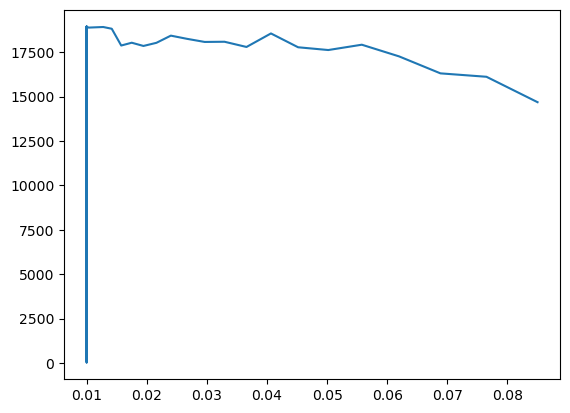

In [40]:
plt.plot(agent.epsilon_list,action_list)

### testing the agent and comparing it with (S,s) policy

In [41]:
X_test=np.array(X_test)

In [42]:
#testing data
testing_env = InventoryEnv(X_test)
testing_env.reset_env()
state = testing_env.reset_env()
test_profits = []

for i in range(len(X_test)):
    action = agent.take_action(X_test[i])
    next_state,reward,t = testing_env.step(action)
    test_profits.append(reward)

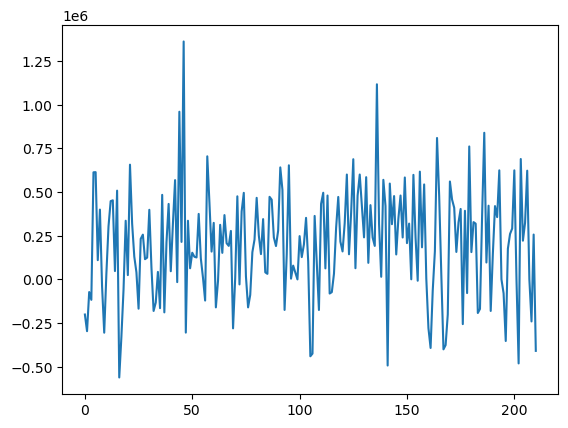

In [43]:
plt.plot(test_profits)

In [44]:
np.mean(test_profits)

201479.36319445734

In [45]:
np.max(test_profits)

1360800.0

In [46]:
testing_env.reset_env()

30000

In [47]:
def ss_policy_calculate(s, S, testing_env, X_test):
    max_profit = 0
    profits_list = []
    total_profit=0
    
    for curr_period in range(len(X_test)):
        inv_pos = testing_env.inventory_pos
        added = 0
        
        if inv_pos <= s:
            order_quantity = min(30000, S-inv_pos)
            added = 1
        else:
            order_quantity = 0

        testing_env.inventory_pos = min(testing_env.inventory_pos+order_quantity,testing_env.capacity)
        
        demand = X_test[curr_period]
        units_sold = min(demand,testing_env.inventory_pos)
        holding_cost = testing_env.holding_cost*(testing_env.inventory_pos-units_sold)
        ordering_cost = added*(testing_env.fixed_cost+order_quantity*testing_env.variable_cost)
        profit = units_sold*testing_env.unit_price-holding_cost-ordering_cost
        
        testing_env.inventory_pos = max(0,testing_env.inventory_pos-demand)
        
        max_profit=max(profit,max_profit)
        total_profit+=profit
        profits_list.append(profit)
    
    return max_profit,total_profit/len(X_test)


In [48]:
sS_list=[]

S_max = int((testing_env.capacity+1)/2)
for S in range(1000,S_max,1000):
    for s in range(S//2,S,500):
        sS_list.append([s,S])
profit_sS_list=[]

In [49]:
sS_list

[[500, 1000],
 [1000, 2000],
 [1500, 2000],
 [1500, 3000],
 [2000, 3000],
 [2500, 3000],
 [2000, 4000],
 [2500, 4000],
 [3000, 4000],
 [3500, 4000],
 [2500, 5000],
 [3000, 5000],
 [3500, 5000],
 [4000, 5000],
 [4500, 5000],
 [3000, 6000],
 [3500, 6000],
 [4000, 6000],
 [4500, 6000],
 [5000, 6000],
 [5500, 6000],
 [3500, 7000],
 [4000, 7000],
 [4500, 7000],
 [5000, 7000],
 [5500, 7000],
 [6000, 7000],
 [6500, 7000],
 [4000, 8000],
 [4500, 8000],
 [5000, 8000],
 [5500, 8000],
 [6000, 8000],
 [6500, 8000],
 [7000, 8000],
 [7500, 8000],
 [4500, 9000],
 [5000, 9000],
 [5500, 9000],
 [6000, 9000],
 [6500, 9000],
 [7000, 9000],
 [7500, 9000],
 [8000, 9000],
 [8500, 9000],
 [5000, 10000],
 [5500, 10000],
 [6000, 10000],
 [6500, 10000],
 [7000, 10000],
 [7500, 10000],
 [8000, 10000],
 [8500, 10000],
 [9000, 10000],
 [9500, 10000],
 [5500, 11000],
 [6000, 11000],
 [6500, 11000],
 [7000, 11000],
 [7500, 11000],
 [8000, 11000],
 [8500, 11000],
 [9000, 11000],
 [9500, 11000],
 [10000, 11000],
 [105

In [50]:
best_profit=float('-inf')
avg_profit=0
for sS in sS_list:
    profit,avg_profit = ss_policy_calculate(sS[0], sS[1], testing_env, X_train)
    profit_sS_list.append(profit)
    if (profit>best_profit):
        best_profit=profit
        best_sS = (sS[0],sS[1])


In [51]:
best_profit_sS,best_avg_profit = ss_policy_calculate(best_sS[0], best_sS[1], testing_env, X_train)

In [52]:
best_profit_sS

2023920.0

In [53]:
best_avg_profit

134754.23658757997

### average profit is greater by 49 %

In [54]:
100*(np.mean(test_profits)-best_avg_profit)/best_avg_profit

49.51616238314788